
# Configuring and Training a Multi-layer Perceptron (MLP) in SciKit-Learn

**(Notebook prepared by Pr Fabien MOUTARDE, Center for Robotics, MINES Paris, PSL Université Paris)**


## 1. Understand and experiment MLP on a VERY simple classification problem

Number of training examples =  270

  first  27 training examples
[  Input_features  ]     [Target_output]
[-0.53864     1.43544347] [1. 0.]
[-0.32439141  1.36212549] [1. 0.]
[-1.08190528  1.04028929] [1. 0.]
[-0.26725862  1.33598552] [1. 0.]
[0.75189258 0.35583023] [1. 0.]
[ 1.25837194 -0.62316304] [0. 1.]
[-1.10724722 -0.09380121] [1. 0.]
[1.68790004 0.14452266] [0. 1.]
[-0.65186794  0.76976757] [1. 0.]
[-0.55143471  0.43169975] [0. 1.]
[0.03128801 0.59231821] [1. 0.]
[ 0.87560225 -0.48087175] [0. 1.]
[-0.23799299  1.40802386] [1. 0.]
[ 1.01983008 -1.48064437] [0. 1.]
[0.16851143 0.5825444 ] [1. 0.]
[-1.15885948  0.59631899] [1. 0.]
[0.59683717 0.80941261] [1. 0.]
[1.26943387 0.50098749] [0. 1.]
[1.70410693 0.60676739] [0. 1.]
[ 0.86762591 -0.83054638] [0. 1.]
[-0.37268536  1.58265482] [1. 0.]
[ 0.97641422 -0.91247841] [0. 1.]
[-0.31292879 -0.8990917 ] [0. 1.]
[1.7622294  0.24143853] [0. 1.]
[-0.083151   -0.93080555] [0. 1.]
[-0.86090093 -0.75082104] [0. 1.]
[1.78162958 0.43256481] [

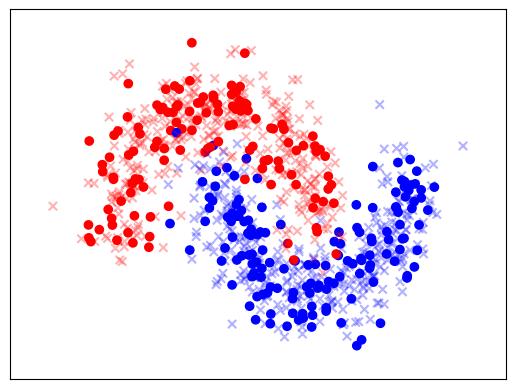

In [1]:
###########################################################################################
# Author: Pr Fabien MOUTARDE, Center for Robotics, MINES ParisTech, PSL Research University
###########################################################################################

%matplotlib inline

import numpy as np

from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.model_selection import train_test_split
from sklearn import preprocessing 
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons

# Create artificial dataset (classification problem within 2 classes within R^2 input space)
Xmoon, y_moon = make_moons(n_samples=900, noise=0.2, random_state=0)

# Preprocess dataset, and split into training and test part
Xmoon = StandardScaler().fit_transform(Xmoon)
Xmoon_train, Xmoon_test, y_moon_train, y_moon_test = train_test_split(Xmoon, y_moon, test_size=0.7)

# Encode class labels as binary vector (with exactly ONE bit set to 1, and all others to 0)
Ymoon_train_OneHot = np.eye(2)[y_moon_train]
Ymoon_test_OneHot = np.eye(2)[y_moon_test]

# Print beginning of training dataset (for verification)
print("Number of training examples = ", y_moon_train.size)
print()
print("  first ", round(y_moon_train.size/10), "training examples" )
print("[  Input_features  ]     [Target_output]")
for i in range( int(round(y_moon_train.size/10) )):
    print( Xmoon_train[i], Ymoon_train_OneHot[i])

# Plot training+testing dataset
################################
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

# Plot the training points...
plt.scatter(Xmoon_train[:, 0], Xmoon_train[:, 1], c=y_moon_train, cmap=cm_bright)
#   ...and testing points
plt.scatter(Xmoon_test[:, 0], Xmoon_test[:, 1], marker='x', c=y_moon_test, cmap=cm_bright, alpha=0.3)

# Define limits/scale of plot axis
x_min, x_max = Xmoon[:, 0].min() - .5, Xmoon[:, 0].max() + .5
y_min, y_max = Xmoon[:, 1].min() - .5, Xmoon[:, 1].max() + .5
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

plt.xticks(())
plt.yticks(())

# Actually render the plot
print()
print("PLOT OF TRAINING EXAMPLES AND TEST DATASET")
print("Datasets: circles=training, light-crosses=test [and red=class_1, blue=class_2]")

plt.ioff()
plt.show()

**Building, training and evaluating a simple Neural Network classifier (Multi Layer Perceptron, MLP)**

The SciKit-learn class for MLP is **MLPClassifier**.
Please first read the [*MLPClassifier documentation*](http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifierMLPClassifier); to understand all parameters of the constructor.
You can then begin by running the code block below, in which an initial set of hyper-parameter values has been chosen.
**YOU MAY NEED TO CHANGE AT LEAST THE NUMBER OF HIDDEN NEURONS (and probably other hyper-parameters) IN ORDER TO BE ABLE TO LEARN A CORRECT CLASSIFIER**


MLPClassifier(activation='tanh', alpha=1e-07, batch_size=4,
              hidden_layer_sizes=(10,), learning_rate_init=0.005, momentum=0.8,
              random_state=11, solver='sgd', tol=1e-05, validation_fraction=0.2,
              verbose=True)
Iteration 1, loss = 1.17806809
Iteration 2, loss = 0.74750288
Iteration 3, loss = 0.63199321
Iteration 4, loss = 0.59160464
Iteration 5, loss = 0.57665139
Iteration 6, loss = 0.56724581
Iteration 7, loss = 0.56261236
Iteration 8, loss = 0.55931120
Iteration 9, loss = 0.55750221
Iteration 10, loss = 0.55642120
Iteration 11, loss = 0.55420965
Iteration 12, loss = 0.55351029
Iteration 13, loss = 0.55230555
Iteration 14, loss = 0.55200567
Iteration 15, loss = 0.55099005
Iteration 16, loss = 0.54825003
Iteration 17, loss = 0.54784000
Iteration 18, loss = 0.54593912
Iteration 19, loss = 0.54494114
Iteration 20, loss = 0.54426518
Iteration 21, loss = 0.54387842
Iteration 22, loss = 0.54030440
Iteration 23, loss = 0.53897639
Iteration 24, loss = 0.5

/Users/florian/opt/anaconda3/envs/cours/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


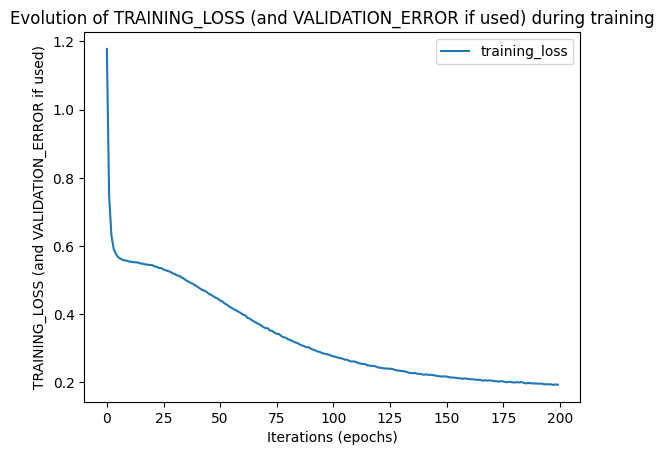

Accuracy (on TEST set) =  0.9587301587301588


In [2]:
#########################################################
# Create, fit and evaluate a MLP neural network classifier
#########################################################
from sklearn.neural_network import MLPClassifier

# Create the MLP (with specific values for hyper-parameters)
mlp = MLPClassifier(hidden_layer_sizes=(10, ), activation='tanh', solver='sgd',
                    alpha=0.0000001, batch_size=4, learning_rate='constant', learning_rate_init=0.005,
                    power_t=0.5, max_iter=200, shuffle=True, random_state=11, tol=0.00001,
                    verbose=True, warm_start=False, momentum=0.8, nesterovs_momentum=True,
                    early_stopping=False, validation_fraction=0.2,
                    beta_1=0.9, beta_2=0.999, epsilon=1e-08)
print(mlp)
# NB about syntax for hidden layers: hidden_layer_sizes=(H1, ) means ONE hidden layer containing H1 neurons,
#   while hidden_layer_sizes=(H1,H2, ) would mean TWO hidden layers of respective sizes H1 and H2
# NB about iteration: max_iter specifies a number of EPOCHS (= going through all training examples)

# Train the MLP classifier on the training dataset
mlp.fit(Xmoon_train, Ymoon_train_OneHot)
print()

# Plot the LEARNING CURVE
plt.title("Evolution of TRAINING_LOSS (and VALIDATION_ERROR if used) during training")
plt.xlabel("Iterations (epochs)")
plt.ylabel("TRAINING_LOSS (and VALIDATION_ERROR if used)")
plt.plot(mlp.loss_curve_, label='training_loss')
if (mlp.validation_scores_ is not None):
    valid_errors = mlp.validation_scores_
    for idx in range(len(mlp.validation_scores_)):
        valid_errors[idx] = 1. - mlp.validation_scores_[idx]
    plt.plot(valid_errors, label='validation_error')
plt.legend()
plt.show()

# Evaluate acuracy on TEST data
score = mlp.score(Xmoon_test, Ymoon_test_OneHot)
print("Accuracy (on TEST set) = ", score)

## Below, we visualize the learnt boundary between classes in (2D) input space ##

**THIS SHOULD HELP YOU UNDERSTAND WHAT HAPPENS IF THERE ARE NOT ENOUGH HIDDEN NEURONS**

Optional: add code that visualises on the same plot the straight lines corresponding to each hidden neuron (you will need to dig into MLPClassifier documentation to find the 2 input weights and the bias of each hidden neuron). YOU SHOULD NOTICE THAT THE CLASSIFICATION BOUNDARY IS SOME INTERPOLATION BETWEEN THOSE STRAIGHT LINES.

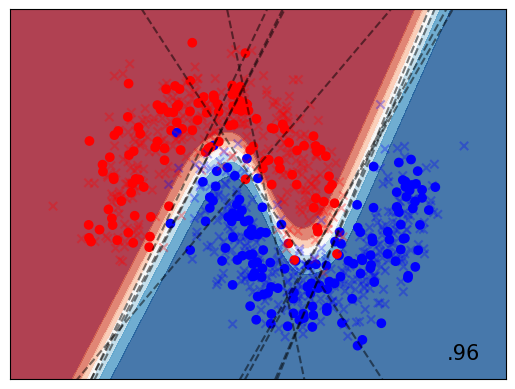

In [3]:
# Plot the decision boundary. For that, we will assign a color to each
#   point in the mesh [x_min, x_max]x[y_min, y_max].

h = .02  # Step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Compute class probabilities for each mesh point
Z = mlp.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=cm, alpha=.8)

# Plot also the training points
plt.scatter(Xmoon_train[:, 0], Xmoon_train[:, 1],
            c=y_moon_train, cmap=cm_bright)
# and testing points
plt.scatter(Xmoon_test[:, 0], Xmoon_test[:, 1],
            marker='x', c=y_moon_test, cmap=cm_bright, alpha=0.3)

# Axis ranges
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

# Print accuracy on plot
plt.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
         size=15, horizontalalignment='right')

# Visualize the straight lines corresponding to each hidden neuron
coefs = mlp.coefs_[0]  # Weights from input to first hidden layer
intercepts = mlp.intercepts_[0]  # Biases of the first hidden layer

for i in range(coefs.shape[1]):
    w = coefs[:, i]
    b = intercepts[i]
    # Calculate the slope and intercept of the line
    slope = -w[0] / w[1]
    intercept = -b / w[1]
    # Plot the line
    x_vals = np.array(plt.gca().get_xlim())
    y_vals = slope * x_vals + intercept
    plt.plot(x_vals, y_vals, '--', color='black', alpha=0.5)

# Actually plot
plt.ioff()
plt.show()

Now, **check, by changing MLPClassifier parameters above and then rerunning training+eval+plots, the impact of main learning hyper-parameters:**
- **number of neurons on hidden layer**: if very small, the classification boundary shall be too simple; if too large, overfitting might occur more easily. 
    **NB: generally, only ONE hidden layer is sufficient (cf. Cybenko theorem)**; *using more than one may require using ReLU as activation function, to avoid gradient "vanishing".*
- **activation functions**
- **number of iterations**: if too small, the training does not finish to converge; if too large, overfitting may occur. 
   **NB: it is therefore usually better to use "early_stopping" with quite large max_iter, so that the actual number of iterations shall adapt by STOPPING WHEN VALIDATION ERROR STOPS DECREASING**
- **solver** (the best choice is generally 'adam'; for more details, see https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_training_curves.html#sphx-glr-auto-examples-neural-networks-plot-mlp-training-curves-py) 
- **learning_rate and momentum: the *initial learning rate* ALWAYS impacts training outcome a lot** (too small may stuck training in bad local minimum; too large can induce strong error fluctuations and possibly no convergence)
- **impact of L2 weight regularization term (alpha)**


### **Finally, use grid-search and cross-validation to find an optimized set of learning hyper-parameters (see code below).**

**Because the values of learning hyper-parameters can DRASTICALLY change the outcome of training, it is ESSENTIAL THAT YOU ALWAYS TRY TO FIND OPTIMIZED VALUES FOR THE ALGORITHM HYPER-PARAMETERS. And this ABSOLUTELY NEEDS TO BE DONE USING "VALIDATION", either with a validation set separate from the training set, or using cross-validation. CROSS-VALIDATION is the MOST ROBUST WAY OF FINDING OPTIMIZED HYPER-PARAMETRS VALUES, and the GridSearchCV function of SciKit-Learn makes this rather straightforward.**

**WARNING:** GridSearchCV launches many successive training sessions, so **can be rather long to execute if you compare too many combinations**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

param_grid = [
    {'hidden_layer_sizes': [(5,), (10,), (20,), (40,)],
     'learning_rate_init': [0.003, 0.01, 0.03, 0.1],
     'alpha': [0.00001, 0.0001, 0.001]}
]
print(param_grid)

# Cross-validation grid-search (for finding best possible accuracy)
# alpha: L2 正则化权重
# cv: 3 折交叉验证
clf = GridSearchCV(MLPClassifier(activation='tanh', alpha=1e-07, batch_size=4, beta_1=0.9,
                                 beta_2=0.999, early_stopping=True, epsilon=1e-08,
                                 hidden_layer_sizes=(10,), learning_rate='constant',
                                 learning_rate_init=0.005, max_iter=20, momentum=0.8,
                                 nesterovs_momentum=True, power_t=0.5, random_state=11, shuffle=True,
                                 solver='adam', tol=1e-05, validation_fraction=0.3, verbose=False,
                                 warm_start=False),
                   param_grid, cv=3, scoring='accuracy')
# NOTE THAT YOU CAN USE OTHER VALUE FOR cv (# of folds) and OTHER SCORING CRITERIA OTHER THAN 'accuracy'

clf.fit(Xmoon_train, Ymoon_train_OneHot)
print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
print()
print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_true, y_pred = Ymoon_test_OneHot, clf.predict(Xmoon_test)
print(classification_report(y_true, y_pred))
print()

[{'hidden_layer_sizes': [(5,), (10,), (20,), (40,)], 'learning_rate_init': [0.003, 0.01, 0.03, 0.1], 'alpha': [1e-05, 0.0001, 0.001]}]


/Users/florian/opt/anaconda3/envs/cours/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


## 2. WORK ON A REALISTIC DATASET:  A SIMPLIFIED HANDWRITTEN DIGITS DATASET

**Please FIRST READ the [*Digits DATASET DESCRIPTION*](http://scikit-learn.org/stable/auto_examples/datasets/plot_digits_last_image.html#sphx-glr-auto-examples-datasets-plot-digits-last-image-py).**
In this classification problem, there are 10 classes, with a total of 1797 examples (each one being a 64D vector corresponding to an 8x8 pixmap). 

**Assignment #1: find out what learning hyper-parameters should be modified in order to obtain a satisfying MLP digits classifier**

**Assignment #2: modify the code below to use cross-validation and find best training hyper-parameters and MLP classifier you can for this handwritten digits classification task.**

**Assignment #3 [Optional]: compute and plot the precision-recall curve (for each class).** NB: search into sciKit-learn documentation to find the function for that, and then add a code cell that uses it.

## Assignment #1

With larger `layer size = 32`, `alpha = 0.001`, `max_iter = 20`, `learning_rate_init = 0.001`, we can get the accuracy on test set close to `0.949`.

## Assignment #3

(Assignment #2 is done below). Below shows the precision-recall curve.

Number_of-examples =  1797

 Plot of first example
CLOSE PLOT WINDOW TO CONTINUE


<Figure size 640x480 with 0 Axes>

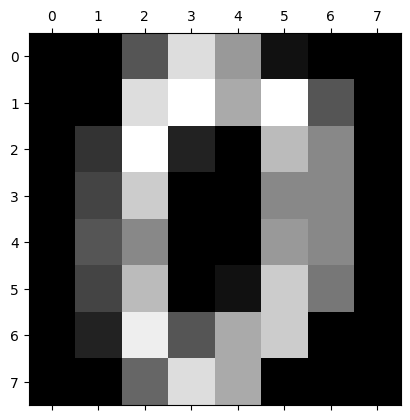

MLPClassifier(activation='tanh', alpha=0.001, batch_size=4,
              hidden_layer_sizes=(32,), max_iter=20, momentum=0.8,
              random_state=11, solver='sgd', tol=1e-05, verbose=True)
Iteration 1, loss = 2.12269550
Iteration 2, loss = 1.41922770
Iteration 3, loss = 1.09690525
Iteration 4, loss = 0.88211823
Iteration 5, loss = 0.71357962
Iteration 6, loss = 0.58619580
Iteration 7, loss = 0.48663246
Iteration 8, loss = 0.42373643
Iteration 9, loss = 0.36078646
Iteration 10, loss = 0.31857775
Iteration 11, loss = 0.28727563
Iteration 12, loss = 0.25157230
Iteration 13, loss = 0.23208578
Iteration 14, loss = 0.21532387
Iteration 15, loss = 0.19504581
Iteration 16, loss = 0.18020559
Iteration 17, loss = 0.17039073
Iteration 18, loss = 0.16160749
Iteration 19, loss = 0.15196698
Iteration 20, loss = 0.14385814


/Users/florian/opt/anaconda3/envs/cours/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


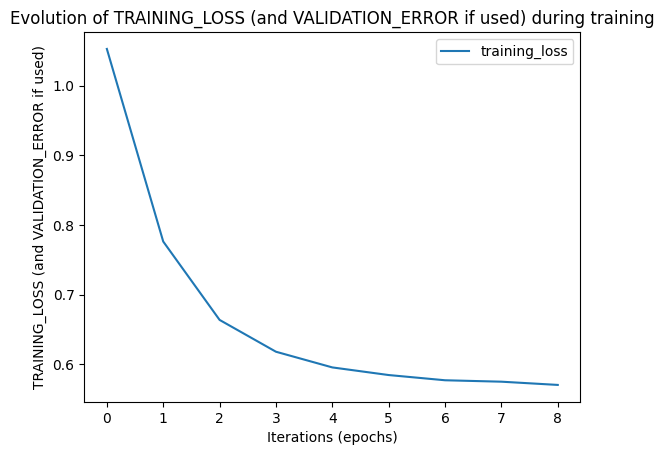

Accuracy (on TEST set) =  0.9632925472747497
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        85
           1       0.94      0.99      0.96        90
           2       1.00      0.97      0.98       101
           3       0.98      0.96      0.97        96
           4       1.00      0.95      0.97        94
           5       0.95      0.96      0.95        92
           6       0.99      0.99      0.99        80
           7       0.95      0.96      0.95        93
           8       0.95      0.91      0.93        88
           9       0.89      0.96      0.92        80

    accuracy                           0.96       899
   macro avg       0.96      0.96      0.96       899
weighted avg       0.96      0.96      0.96       899

CONFUSION MATRIX below
Iteration 1, loss = 2.12269550
Iteration 2, loss = 1.41922770
Iteration 3, loss = 1.09690525
Iteration 4, loss = 0.88211823
Iteration 5, loss = 0.71357962
Iteration 6, loss 

/Users/florian/opt/anaconda3/envs/cours/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


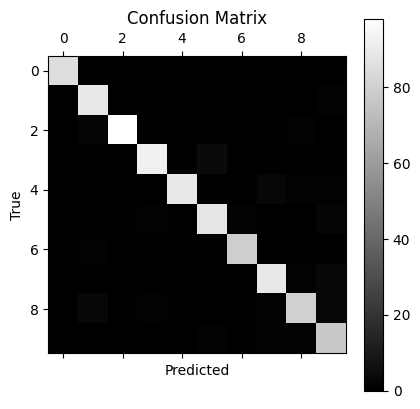

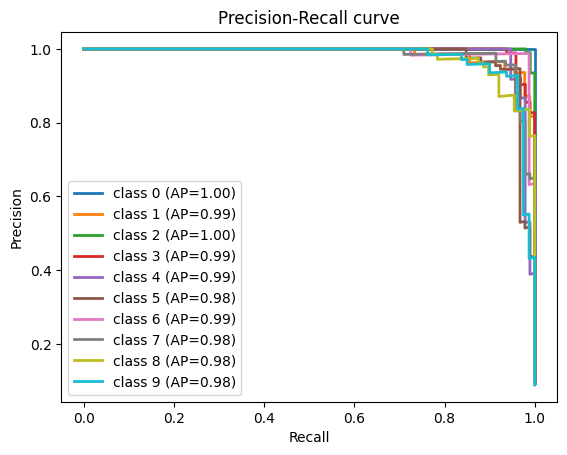

In [37]:

from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.preprocessing import label_binarize
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

digits = load_digits()
n_samples = len(digits.images)
print("Number_of-examples = ", n_samples)

print("\n Plot of first example")
plt.gray()
plt.matshow(digits.images[0])
print("CLOSE PLOT WINDOW TO CONTINUE")
plt.ioff()
plt.show()

# Flatten the images, to turn data in a (samples, feature) matrix:
data = digits.images.reshape((n_samples, -1))

Xdigits = data
y_digits = digits.target
Xdigits_train, Xdigits_test, y_digits_train, y_digits_test = train_test_split(
    Xdigits, y_digits, test_size=0.5)

clf = MLPClassifier(hidden_layer_sizes=(32, ), activation='tanh', solver='sgd',
                    alpha=0.001, batch_size=4, learning_rate='constant', learning_rate_init=0.001,
                    power_t=0.5, max_iter=20, shuffle=True, random_state=11, tol=0.00001,
                    verbose=True, warm_start=False, momentum=0.8, nesterovs_momentum=True,
                    early_stopping=False, validation_fraction=0.1,
                    beta_1=0.9, beta_2=0.999, epsilon=1e-08)
print(clf)

# Train the MLP classifier on training dataset
clf.fit(Xdigits_train, y_digits_train)

# Plot the LEARNING CURVE
plt.title("Evolution of TRAINING_LOSS (and VALIDATION_ERROR if used) during training")
plt.xlabel("Iterations (epochs)")
plt.ylabel("TRAINING_LOSS (and VALIDATION_ERROR if used)")
plt.plot(mlp.loss_curve_, label='training_loss')
if (clf.validation_scores_ is not None):
    valid_errors = clf.validation_scores_
    for idx in range(len(clf.validation_scores_)):
        valid_errors[idx] = 1. - clf.validation_scores_[idx]
    plt.plot(valid_errors, label='validation_error')
plt.legend()
plt.show()

# Evaluate acuracy on test data
score = clf.score(Xdigits_test, y_digits_test)
print("Accuracy (on TEST set) = ", score)
y_true, y_pred = y_digits_test, clf.predict(Xdigits_test)
print(classification_report(y_true, y_pred))

# Display CONFUSION MATRIX on TEST set
print("CONFUSION MATRIX below")
confusion_matrix(y_true, y_pred)

# On test set
clf.fit(Xdigits_train, y_digits_train)

score = clf.score(Xdigits_test, y_digits_test)
print("Accuracy (on TEST set) = ", score)

y_true, y_pred = y_digits_test, clf.predict(Xdigits_test)
print(classification_report(y_true, y_pred))

print("CONFUSION MATRIX below")
conf_matrix = confusion_matrix(y_true, y_pred)
print(conf_matrix)

# Clear matrix
plt.matshow(conf_matrix, cmap=plt.cm.gray)
plt.title("Confusion Matrix")
plt.colorbar()
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


# Predict probabilities for the test set
y_scores = clf.predict_proba(Xdigits_test)

# Compute Precision-Recall and plot curve for each class
for i in range(len(clf.classes_)):
    # Get sampling points by adjusting the classification threshold
    precision, recall, _ = precision_recall_curve(
        y_digits_test == i, y_scores[:, i])
    average_precision = average_precision_score(
        y_digits_test == i, y_scores[:, i])

    plt.plot(recall, precision, lw=2,
             label=f'class {i} (AP={average_precision:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend(loc='best')
plt.show()

## Assignment 2:

We can use `GridSearchCV` to find the best parameters in the given parameter set.

The best ones found are `{'alpha': 0.0001, 'hidden_layer_sizes': (32,), 'learning_rate_init': 0.003}`.

In [32]:
param_grid = [
    {'hidden_layer_sizes': [(8,), (16,), (32,)],
     'learning_rate_init': [0.003, 0.01, 0.03, 0.1],
     'alpha': [0.0001, 0.001, 0.01]}
]
print(param_grid)

# Cross-validation grid-search (for finding best possible accuracy)
# alpha: L2 正则化权重
# cv: 3 折交叉验证
clf = GridSearchCV(
    MLPClassifier(
        hidden_layer_sizes=(10, ), activation='tanh', solver='sgd',
        alpha=0.00001, batch_size=4, learning_rate='constant', learning_rate_init=0.01,
        power_t=0.5, max_iter=9, shuffle=True, random_state=11, tol=0.00001,
        verbose=False, warm_start=False, momentum=0.8, nesterovs_momentum=True,
        early_stopping=False, validation_fraction=0.1,
        beta_1=0.9, beta_2=0.999, epsilon=1e-08),
    param_grid, cv=3, scoring='accuracy'
)
# NOTE THAT YOU CAN USE OTHER VALUE FOR cv (# of folds) and OTHER SCORING CRITERIA OTHER THAN 'accuracy'

# Train the MLP classifier on training dataset
clf.fit(Xdigits_train, y_digits_train)

print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
print()
print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()

[{'hidden_layer_sizes': [(8,), (16,), (32,)], 'learning_rate_init': [0.003, 0.01, 0.03, 0.1], 'alpha': [0.0001, 0.001, 0.01]}]


/Users/florian/opt/anaconda3/envs/cours/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (9) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/florian/opt/anaconda3/envs/cours/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (9) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/florian/opt/anaconda3/envs/cours/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (9) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/florian/opt/anaconda3/envs/cours/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (9) reached and the optimization hasn't converge

Best parameters set found on development set:

{'alpha': 0.0001, 'hidden_layer_sizes': (32,), 'learning_rate_init': 0.003}

Grid scores on development set:

0.697 (+/-0.221) for {'alpha': 0.0001, 'hidden_layer_sizes': (8,), 'learning_rate_init': 0.003}
0.579 (+/-0.231) for {'alpha': 0.0001, 'hidden_layer_sizes': (8,), 'learning_rate_init': 0.01}
0.231 (+/-0.190) for {'alpha': 0.0001, 'hidden_layer_sizes': (8,), 'learning_rate_init': 0.03}
0.118 (+/-0.007) for {'alpha': 0.0001, 'hidden_layer_sizes': (8,), 'learning_rate_init': 0.1}
0.889 (+/-0.044) for {'alpha': 0.0001, 'hidden_layer_sizes': (16,), 'learning_rate_init': 0.003}
0.625 (+/-0.287) for {'alpha': 0.0001, 'hidden_layer_sizes': (16,), 'learning_rate_init': 0.01}
0.159 (+/-0.117) for {'alpha': 0.0001, 'hidden_layer_sizes': (16,), 'learning_rate_init': 0.03}
0.090 (+/-0.010) for {'alpha': 0.0001, 'hidden_layer_sizes': (16,), 'learning_rate_init': 0.1}
0.938 (+/-0.022) for {'alpha': 0.0001, 'hidden_layer_sizes': (32,), 'learning_r

/Users/florian/opt/anaconda3/envs/cours/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (9) reached and the optimization hasn't converged yet.
  warnings.warn(
